In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

In [49]:
def make_pred(x, w, b):
    return np.matmul(x, w) + b

def compute_cost(x, y, w, b):
    sqr_diff = (make_pred(x, w, b) - y)**2
    return sqr_diff.sum() / (2*x.shape[0])

def run_grad_decent(x, y, w, b, alpha):
    cost_sum = ((make_pred(x, w, b)-y).sum() / x.shape[1])
    new_b = b - alpha * cost_sum

    j = x.shape[1]
    i = x.shape[0]

    preds = x*(np.matmul(x, w) + b - y)
    new_w = np.sum(preds, axis=0)

    new_w /= i
    new_w = w - (alpha * new_w.reshape([j, 1]))

    return new_w, new_b

def run_linear_regression(x, y, alpha = .004, iter = 2000):    
    j = x.shape[1]
    w = np.zeros([j, 1])
    b = 0
    cost_history = []
    print(b)
    cost_history.append(compute_cost(x, y, w, b))
    for _ in range(iter):
        w, b = run_grad_decent(x, y, w, b, alpha)
        cost_history.append(compute_cost(x, y, w, b))
    print(compute_cost(x, y, w, b))
    return w, b, cost_history 

0
0.9051350787648073
0
0.9051306580917462
0
0.9050964643828551
0
0.9046948622873656


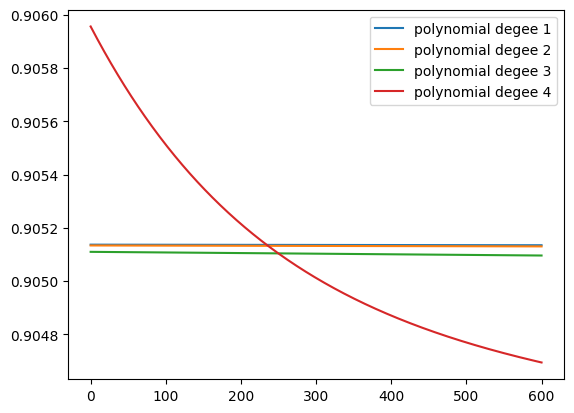

In [50]:
# Grab dataset from file
car_dataframe = pd.read_csv("data/car details v4.csv")
data = (car_dataframe.loc[:, ["Fuel Tank Capacity", "Year", "Price"]]).to_numpy().astype('float64')

# Use simple data cleaning of dropping all null data
data_clean = data[~np.isnan(data).any(axis=1)]

# Suffle data insure equal distabution between train, validation, and test sets (Also use seed to insure determinisum)
rng = np.random.default_rng(seed=42)
rng.shuffle(data_clean)

# Split up data set into train, validation, and test
train_set_end_index = int(data_clean.shape[0]/2)
validation_set_end_index = int(3*data_clean.shape[0]/4)
train_set = data_clean[:train_set_end_index]
validation_set = data_clean[train_set_end_index:validation_set_end_index]
test_set = data_clean[validation_set_end_index:]

x = train_set[:, :2]
y = train_set[:, 2:]

normalization_vars = np.empty((x.shape[1], 2))

for i in range(x.shape[1]):
    mean = x[:, i:i+1].mean()
    std_dev = x[:, i:i+1].std()
    x[:, i:i+1] = (x[:, i:i+1] - mean) / std_dev
    normalization_vars[i] = [mean, std_dev]

# Normalize targets to prevent overflow error.
target_mean = y.mean()
y = y / target_mean
# run_linear_regression(x, y)

polynomial_architectures = [x]
validation_set_architectures = [x]

polynomial_degree = 4

for _i in range(polynomial_degree-1):
    last_polygon = polynomial_architectures[-1]
    polynomal_set = np.empty([last_polygon.shape[0], last_polygon.shape[1]**2+last_polygon.shape[1]])

    for i in range(last_polygon.shape[0]):
        for j in range(last_polygon.shape[1]):
            polynomal_set[i, j] = last_polygon[i, j]

    for i in range(last_polygon.shape[0]):
        index = 0
        for j in range(last_polygon.shape[1]):
            for k in range(last_polygon.shape[1]):
                polynomal_set[i, index+last_polygon.shape[1]] = last_polygon[i, j] * last_polygon[i, k]
                index += 1

    polynomial_architectures.append(polynomal_set)

'''
for _i in range(polynomial_degree-1):
    last_polygon = validation_set_architectures[-1]
    polynomal_set = np.empty([last_polygon.shape[0], last_polygon.shape[1]**2])

    for i in range(last_polygon.shape[0]):
        index = 0
        for j in range(last_polygon.shape[1]):
            for k in range(last_polygon.shape[1]):
                polynomal_set[i, index] = last_polygon[i, j] * last_polygon[i, k]
                index += 1

    validation_set_architectures.append(polynomal_set)
'''

for x in polynomial_architectures:
    for i in range(x.shape[1]):
        mean = x[:, i:i+1].mean()
        std_dev = x[:, i:i+1].std()
        x[:, i:i+1] = (x[:, i:i+1] - mean) / std_dev / 100

    # Devide all values in training set by 100 to avoid overflow error with high degree polynomials
    x /= 10

cost_histories = []

for i in range(polynomial_degree):
    _,_, cost_history = run_linear_regression(polynomial_architectures[i], y)
    cost_histories.append(cost_history)

for i in range(len(cost_histories)):
    x = cost_histories[i]
    # skip the first 400 training iterations in our visualiztion make the differaces in the lines in our graph visable.
    plt.plot(x[1600:], label = f"polynomial degee {i+1}") 

plt.legend()
plt.show()

for architecture in polynomial_architectures:
    # run_linear_regression(architecture, y)
    # Get train set x and y
    # Get validation set x and y
    # Train on train set
    # Save cost of traing set
    # Save cost of validation set
    pass